# Assignment two

## Part one
For the first part of the second assignment of Embedded Vision, morphological image processing is used to remove the smaller circles of the following image. 


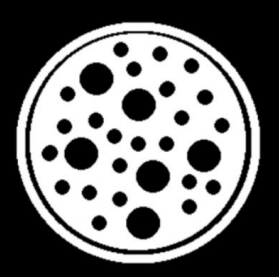

### Prerequisite

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image = np.array(Image.open("circles.gif").convert("L"))

### Morphological image processing
Morphological image processing is a set of operations on a image. It is used for noise removal, image enhancement and feature extraction. With the fundamental operations being erosion and dilation. To use the operations in Python the library OpenCV is used. 

#### Erosion
Erosion is used to remove small noise and detaching two connected objects in an image.

In [11]:
# erosion = cv.erode(image, kernel, iterations)

#### Dilation
Dilation is the opposite of erosion. It adds pixels to the boundaries of an object in an image. Dilation is used to increase the size of objects or used to close small holes or gasps in an object. 

In [12]:
# dilation = cv.dilate(image, kernel, iterations)

#### Opening

Opening is an operation where erosion is followed by dilation. It is usefull for removing small objects while maintaining the shape and size of larger objects in an image.

In [13]:
# opening = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)

#### Closing

Closing is the opposite of opening. Opening is an operation where dilation is followed by erosion. It is usefull to close small holes.

In [14]:
# closing = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)

### Get the ring 
The first step is to get the ring in the circle. This is done by first removing the ring from the circle with a closing operation. Then the image without the ring is inverted and added to the original image to get an image with only the ring. Then to remove the noise another closing operation is performed.

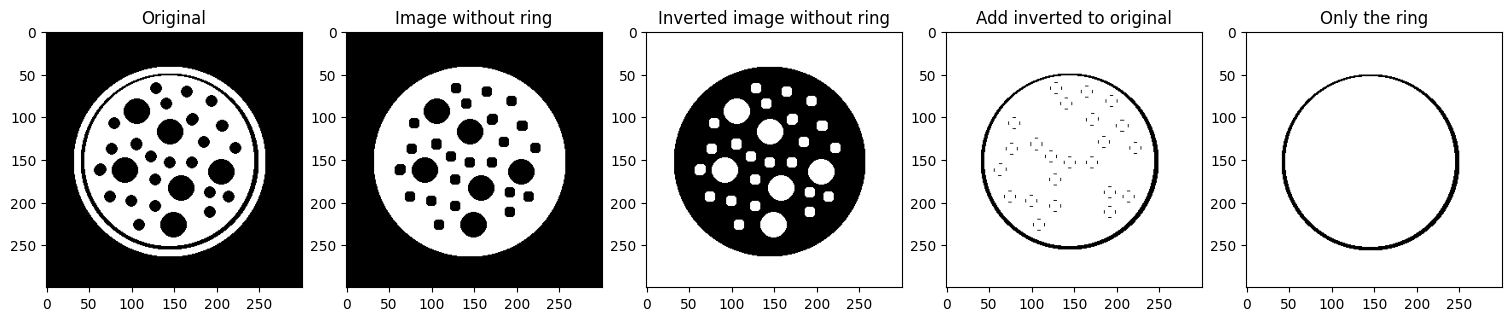

In [17]:
def closing(im, kernel_size, iteration):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel, iterations=iteration)

def get_ring_image(im):
    fig, axes = plt.subplots(1, 5, figsize=(15, 7), layout="constrained")
    axes[0].set(title="Original")
    axes[0].imshow(im, cmap='gray')

    # Remove the ring from the image
    no_ring = closing(im, 7, 1)
    axes[1].set(title="Image without ring")
    axes[1].imshow(no_ring, cmap='gray')

    # Invert the image and add it to the original image to only get the ring
    invert_no_ring = cv2.bitwise_not(no_ring)
    axes[2].set(title="Inverted image without ring")
    axes[2].imshow(invert_no_ring, cmap='gray')

    invert_add_original = cv2.add(im, invert_no_ring)
    axes[3].set(title="Add inverted to original")
    axes[3].imshow(invert_add_original, cmap='gray')

    # Use closing operation to remove the 'noise'
    only_ring = closing(invert_add_original, 2, 1)
    axes[4].set(title="Only the ring")
    axes[4].imshow(only_ring, cmap='gray')

    plt.show()

    return only_ring


only_ring = get_ring_image(image)

### Remove small circles
The next step is to remove the small circles in the image. This is also done with a closing operation.

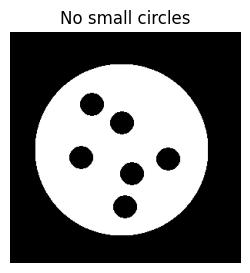

In [18]:
def show_image(im, title):
    plt.figure(figsize=(7, 3))
    plt.imshow(im, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()
    
def remove_small_circles(im):
    radius = 10
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * radius + 1, 2 * radius + 1))
    closing = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel)
    show_image(closing, "No small circles")
    return closing

closing = remove_small_circles(image)

### Result
By adding the result of the closing operation and the image with only the ring the final image is created. It shows that the ring and the smaller circles are removed from the image. 

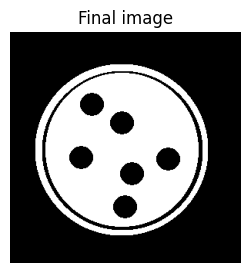

In [22]:
final = closing + only_ring
final = cv2.bitwise_not(final)
show_image(final, "Final image")